In [8]:
import numpy as np

from filterpy.monte_carlo import residual_resample

import cv2

from PIL import Image

import matplotlib.pyplot as plt

import glob

import math

import time


import imageProcess_ORIGINAL as imp

In [9]:

def draw_arrow(image, l, h, scale = 1):
    pt1 = (int(image.shape[1]/2 + l*scale), image.shape[0])
    pt2 = (int(image.shape[1]/2 + l*scale + image.shape[1]/2 * math.tan(h)), image.shape[0]/2)

    cv2.arrowedLine(image, pt1, pt2,(0,0,255), 4)
    return image


In [10]:
images = ['nav_front/frame_' + str(a) + '.jpg' for a in range(len(glob.glob('nav_front/*.jpg')))]



In [15]:

image = np.array(Image.open(image_path))
image.shape

(480, 640, 3)

In [41]:
headings = []

for image_path in images:
    image = np.array(Image.open(image_path))
    frame, I1_prime, I2_prime, I3_prime = imp.get_img(image)
    frame, mask_show, centroid_1, mask_show2 = imp.get_centroid(~frame, ~I1_prime, ~I2_prime, ~I3_prime)

    if(centroid_1[0] > 0):
            theta = (320 - centroid_1[0])
            #theta = round(math.atan2(theta,240.),2)
            #print(theta)
            cen = (centroid_1[0], 240)
            headings.append(math.atan2(theta, 240.))
            print(cen)
            image = cv2.arrowedLine(image, (320, 640), cen,(100,255,255), 4)
            


    plt.imsave('pf_output_adal/' + image_path.split('/')[1], image)

(312, 240)
(315, 240)
(315, 240)
(320, 240)
(316, 240)
(317, 240)
(318, 240)
(311, 240)
(308, 240)
(314, 240)
(313, 240)
(318, 240)
(294, 240)
(304, 240)
(305, 240)
(302, 240)
(307, 240)
(300, 240)
(298, 240)
(296, 240)
(291, 240)
(297, 240)
(294, 240)
(296, 240)
(306, 240)
(310, 240)
(311, 240)
(312, 240)
(309, 240)
(312, 240)
(311, 240)
(322, 240)
(319, 240)
(316, 240)
(306, 240)
(301, 240)
(280, 240)
(280, 240)
(275, 240)
(281, 240)
(285, 240)
(286, 240)
(277, 240)
(280, 240)
(277, 240)
(278, 240)
(273, 240)
(274, 240)
(259, 240)
(261, 240)
(261, 240)
(263, 240)
(268, 240)
(285, 240)
(280, 240)
(282, 240)
(280, 240)
(286, 240)
(286, 240)
(290, 240)
(284, 240)
(303, 240)
(300, 240)
(291, 240)
(295, 240)
(294, 240)
(298, 240)
(297, 240)
(292, 240)
(291, 240)
(305, 240)
(296, 240)
(316, 240)
(337, 240)
(314, 240)
(312, 240)
(312, 240)
(313, 240)
(312, 240)
(312, 240)
(319, 240)
(312, 240)
(311, 240)
(301, 240)
(306, 240)
(311, 240)
(316, 240)
(308, 240)
(313, 240)
(322, 240)
(315, 240)

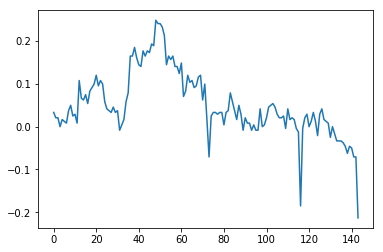

In [35]:
plt.plot(headings)

In [36]:
import json

data = {'headings': headings}
with open('adalberto.json', 'w') as f:
    json.dump(data,f)